# 1.

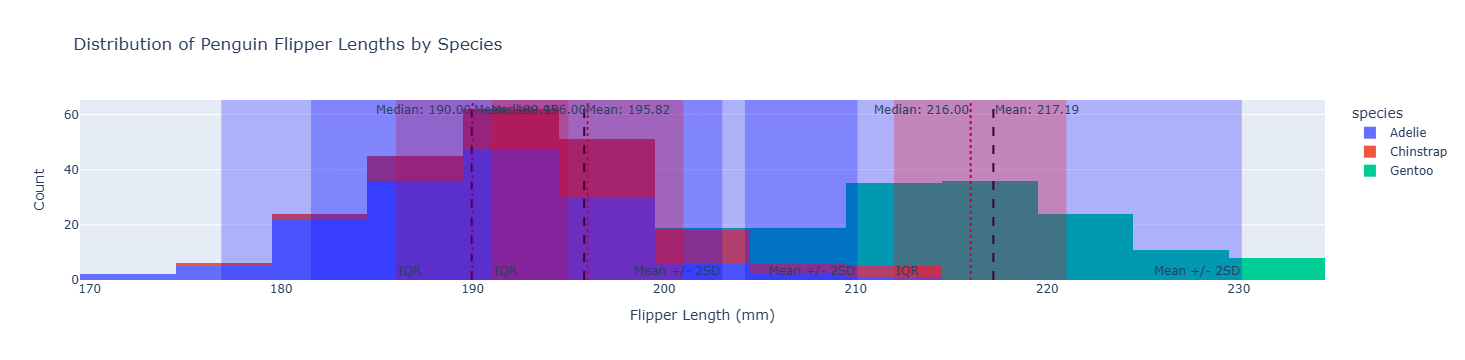

In [17]:
import pandas as pd
import plotly.express as px

# **Load and Prepare Data:** Load the penguins dataset into a pandas DataFrame
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# **Create Histograms:** Use Plotly Express to create histograms for 'flipper_length_mm' for each species
fig = px.histogram(penguins, x="flipper_length_mm", color="species",
                   title="Distribution of Penguin Flipper Lengths by Species")

# **Calculate Statistics:** Calculate the mean, median, range, interquartile range, and two standard deviations 
# from the mean for each species' flipper length
for species in penguins["species"].unique():
    subset = penguins[penguins["species"] == species]
    mean = subset["flipper_length_mm"].mean()
    median = subset["flipper_length_mm"].median()
    std = subset["flipper_length_mm"].std()
    q1 = subset["flipper_length_mm"].quantile(0.25)
    q3 = subset["flipper_length_mm"].quantile(0.75)
    
    # **Add Lines and Rectangles:** Utilize  `fig.add_vline()`  and  `fig.add_vrect()`  to mark the 
    # calculated statistics on the histograms. Remember to consult the Plotly documentation 
    # for precise usage and parameter options.
    fig.add_vline(x=mean, line_width=2, line_dash="dash", line_color="black", 
                  annotation_text=f"Mean: {mean:.2f}", annotation_position="top right")
    fig.add_vline(x=median, line_width=2, line_dash="dot", line_color="red", 
                  annotation_text=f"Median: {median:.2f}", annotation_position="top left")
    fig.add_vrect(x0=mean - 2 * std, x1=mean + 2 * std, 
                  annotation_text=f"Mean +/- 2SD", annotation_position="bottom right",
                  fillcolor="rgba(0,0,255,0.25)", line_width=0)
    fig.add_vrect(x0=q1, x1=q3, 
                  annotation_text=f"IQR", annotation_position="bottom left",
                  fillcolor="rgba(255,0,0,0.25)", line_width=0)
    
# **Customize and Display:** Customize the appearance of your plot with labels, titles, 
# and legends. Finally, display the plot.
fig.update_layout(xaxis_title="Flipper Length (mm)", yaxis_title="Count")
fig.show()

# 2.

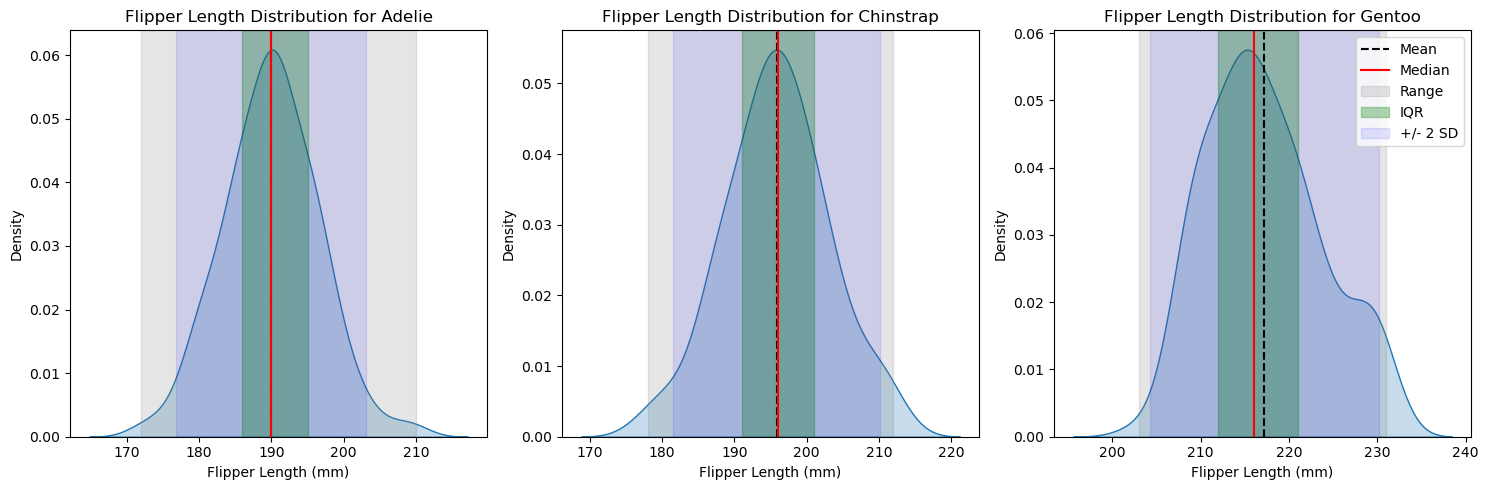

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the penguins dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Create a figure and a row of three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Iterate over each species
for i, species in enumerate(penguins["species"].unique()):
    # Subset the data for the current species
    subset = penguins[penguins["species"] == species]

    # Create the KDE plot
    sns.kdeplot(data=subset, x="flipper_length_mm", fill=True, ax=axes[i])
    
    # Calculate statistics
    mean = subset["flipper_length_mm"].mean()
    median = subset["flipper_length_mm"].median()
    std = subset["flipper_length_mm"].std()
    q1 = subset["flipper_length_mm"].quantile(0.25)
    q3 = subset["flipper_length_mm"].quantile(0.75)

    # Add vertical lines for mean and median
    axes[i].axvline(mean, color='black', linestyle='--', label='Mean')
    axes[i].axvline(median, color='red', linestyle='-', label='Median')

    # Add shaded regions for range, IQR, and +/- 2 standard deviations
    axes[i].axvspan(subset["flipper_length_mm"].min(), subset["flipper_length_mm"].max(), alpha=0.2, color='gray', label='Range')
    axes[i].axvspan(q1, q3, alpha=0.3, color='green', label='IQR')
    axes[i].axvspan(mean - 2*std, mean + 2*std, alpha=0.1, color='blue', label='+/- 2 SD')

    # Set title and labels
    axes[i].set_title(f"Flipper Length Distribution for {species}")
    axes[i].set_xlabel("Flipper Length (mm)")
    axes[i].set_ylabel("Density")

# Add a common legend
plt.legend()
plt.tight_layout()
plt.show()

# 3.

Describe to a ChatBot:

I think the box plot graphically summarizes the spread of a numerical data distribution around its median. It's excellent for comparing distributions across different categories.

I think the histogram displays the distribution of numerical data by dividing it into "bins" (ranges of values) and showing the frequency of data points falling into each bin as a bar. Provides a good visual representation of the data's distribution shape.

I think the KDEs are a smooth, continuous representation of the data distribution. They use a "kernel" (a mathematical function) to estimate the probability density at each point on the x-axis. Can provide a more accurate representation of the underlying distribution, especially for continuous data.

The ChatBot agrees with me in part.

Here is a "pros and cons" list of box plots, histograms, and kernel density estimators as data distribution visualization methods.

Box Plot

●
Pr:
○
Box plots effectively compare distributions across different categoes.
○
They clearly indicate the presence of skew in a d
aset.
Cons:
○
Box plots do not represent multimodality in dataset.
○
They do not inherently indicate the amount of data they represent without an explici
t annotatio

Histrams
●
Pros:
○
Histograms provide a visual representation of the shape of a ta distribution.
○
They show the mode (or most fruent value range).
○
They can
eveal ltimodality.
●
Cons:
○
The choice of bin width can affect the appearance and interp

etation of the histogram.
Kernelensity Estimators
●
Pros:
○
Kernel density estimators ca
revealultimodality in data.
●
Cons:
○
Kernel density estimation depends on a bandwidth parameter, which can influence smoothness and interpretation.

My preference among these visualization methods often leans towards KDEs, especially when exploring data for my own understanding or when presenting to a statistically inclined audience. Here's why:

1. Smooth Representation: I find KDE plots visually appealing, and their smooth curves can better highlight the shape of the distribution compared to the blocky nature of histograms.
   
2. Multimodality Handling: KDEs effectively reveal multimodality in data, which can be a significant insight easily missed with box plots.
   
3. Flexibility: The bandwidth parameter allows me to fine-tune the KDE's smoothness, enabling me to balance detail and clarity.

# 4.

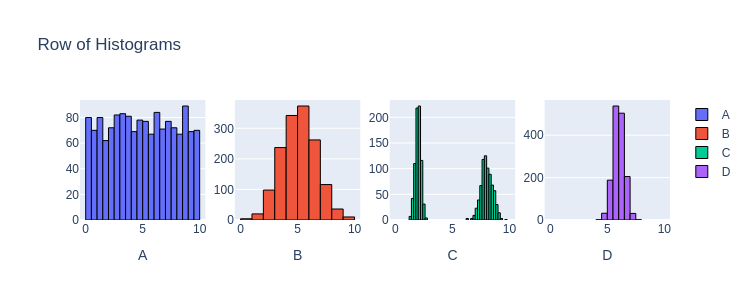

In [2]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

1. Histograms A and B appear to have similar means and variances. Both are centered around the middle of the x-axis (around 5), suggesting similar means. Their spreads also appear comparable, indicating similar variances.

2. None of the provided histograms seem to fit this description.

3. Histograms B and D likely have similar variances but different means. Both exhibit a similar spread around their respective means, suggesting similar variances. However, Histogram D is centered around a noticeably higher value (around 6) compared to Histogram B (around 5), indicating different means.

4. Histograms C and D likely have different means and variances. Histogram C, being bimodal, has a higher variance than the more tightly clustered Histogram D. Their means also differ, with C having a less clear mean due to its bimodal nature and D being centered around a higher value.

# 5.

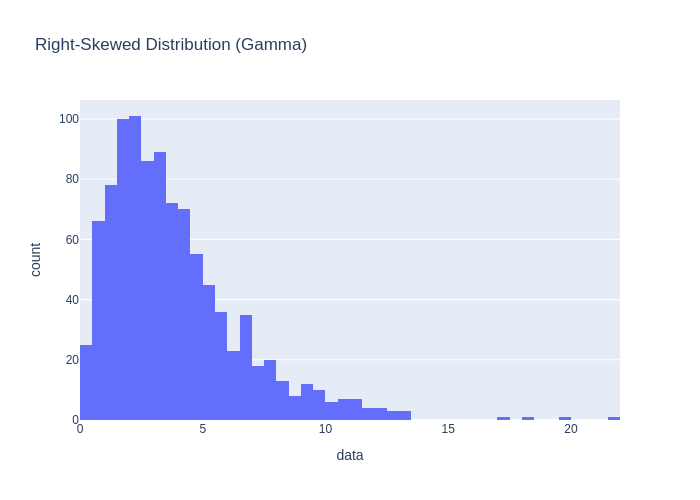

Mean of Right-Skewed Sample: 3.87
Median of Right-Skewed Sample: 3.26


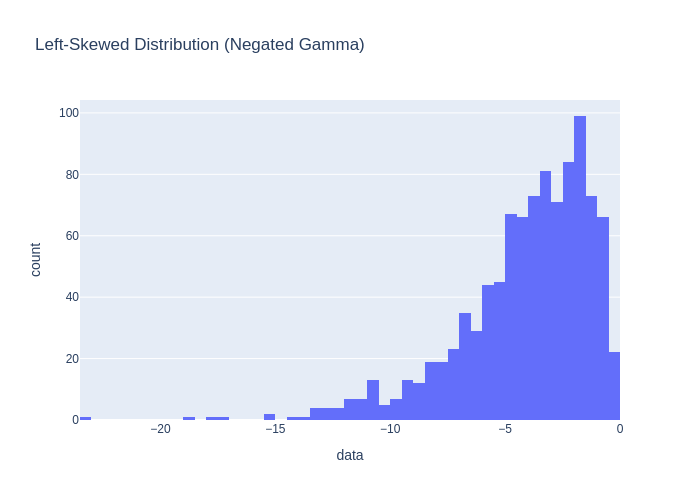

Mean of Left-Skewed Sample: -4.15
Median of Left-Skewed Sample: -3.52


In [9]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px

# Generate a right-skewed distribution (gamma distribution)
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

# Create a histogram to visualize the right-skewed distribution
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data", title="Right-Skewed Distribution (Gamma)")
fig1.show(renderer="png")  # Use this for GitHub/MarkUs submissions

# Calculate the mean and median
mean1 = sample1.mean()
median1 = np.quantile(sample1, [0.5])[0]  # Extracting the single value from the array

print(f"Mean of Right-Skewed Sample: {mean1:.2f}")
print(f"Median of Right-Skewed Sample: {median1:.2f}")

# Generate a left-skewed distribution (negating gamma distribution)
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)

# Create a histogram to visualize the left-skewed distribution
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data", title="Left-Skewed Distribution (Negated Gamma)")
fig2.show(renderer="png")  # Use this for GitHub/MarkUs submissions

# Calculate the mean and median
mean2 = sample2.mean()
median2 = np.quantile(sample2, [0.5])[0]

print(f"Mean of Left-Skewed Sample: {mean2:.2f}")
print(f"Median of Left-Skewed Sample: {median2:.2f}")


Skewness describes the asymmetry of a data distribution.  A right-skewed distribution has a longer tail on the right side, while a left-skewed distribution has a longer tail on the left side.

Mean: The mean is the average of all data points.   It is sensitive to extreme values, which means that it is pulled in the direction of the skew.

Median: The median is the middle value in a sorted dataset.  It is less affected by extreme values than the mean.

How Skewness Affects the Mean and Median:

Right Skewness: In a right-skewed distribution, the mean is pulled towards the longer tail on the right, making it greater than the median.  You previously provided code that generated a right-skewed Gamma distribution to illustrate this relationship.

Left Skewness:  Conversely, in a left-skewed distribution, the mean is pulled towards the left tail, making it less than the median.

Right-Skewed Distribution:

When a distribution is right-skewed (like sample1, generated from the gamma distribution), the tail on the right side is longer.
Mean: The mean is pulled in the direction of the tail (right), making it larger than the median.
Median: The median remains closer to the center of the data.
As a result, for right-skewed distributions: Mean > Median.

Left-Skewed Distribution:

When a distribution is left-skewed (like sample2, generated by negating the gamma distribution), the tail on the left side is longer.
Mean: The mean is pulled towards the left tail, making it smaller than the median.
Median: Again, the median is resistant to outliers and tends to stay near the center.
Hence, for left-skewed distributions: Mean < Median.

# 6.

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


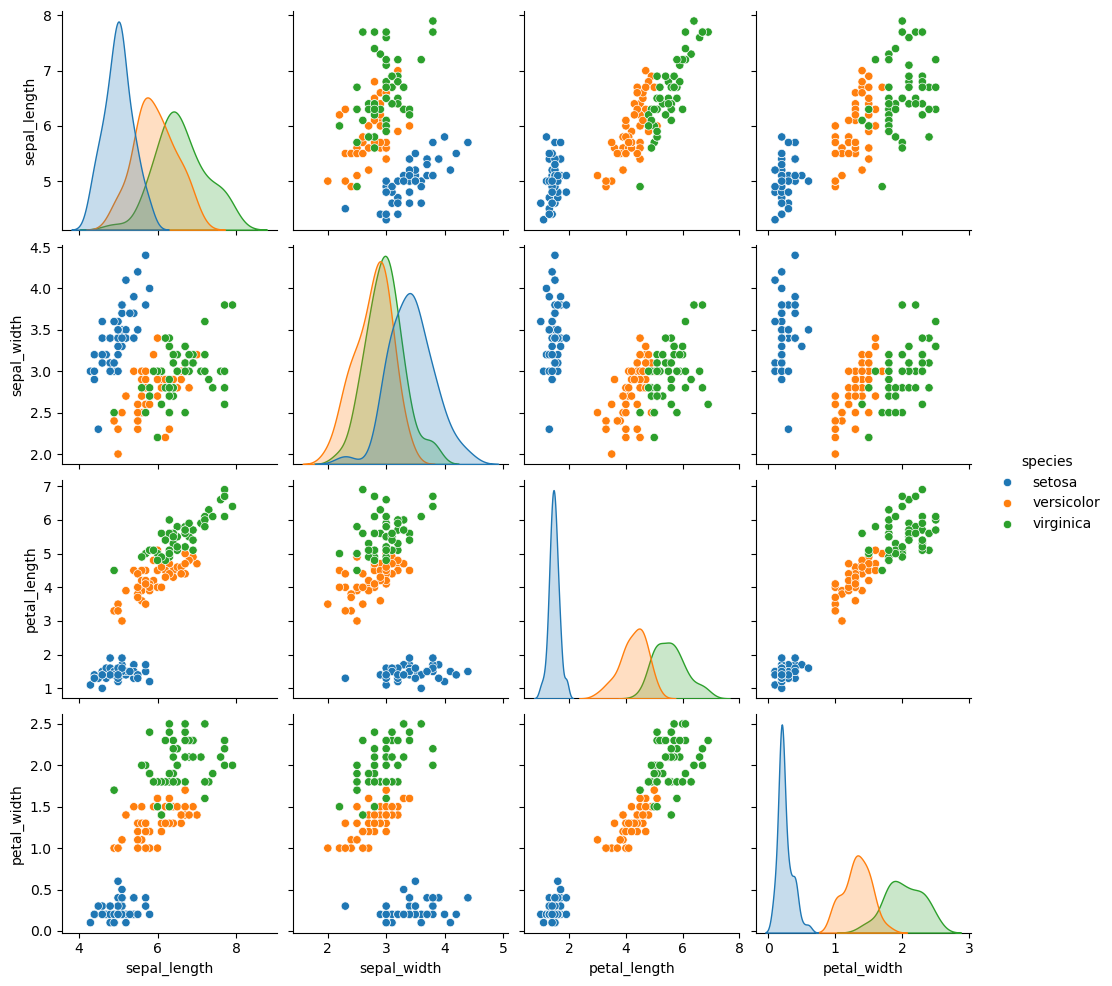

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())

# Summary statistics
print(df.describe())

# Visualizations
sns.pairplot(df, hue="species")
plt.show()


# 7.

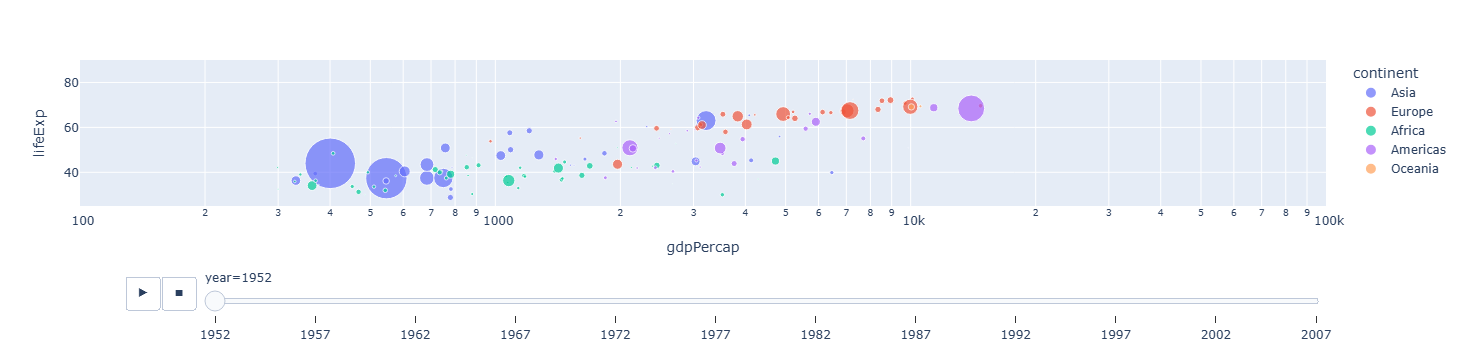

In [24]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

# 8.

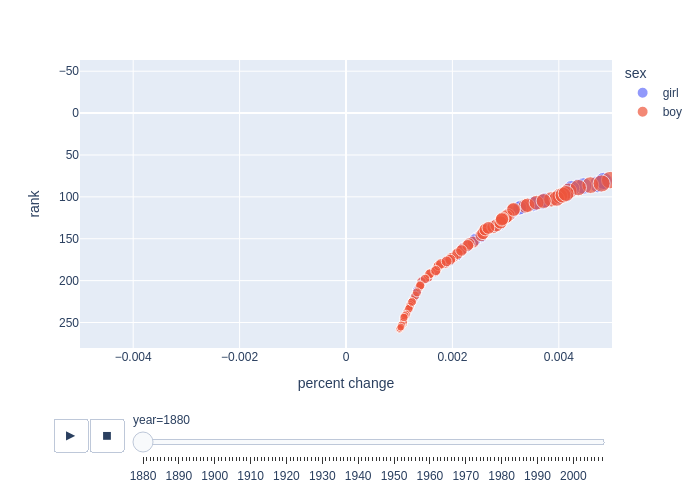

In [28]:
import pandas as pd
import plotly.express as px

# Load the dataset
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

# Make identical boy and girl names distinct
bn['name'] = bn['name'] + " " + bn['sex']

# Rank the names by year
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name', 'year'])

# Create the increase or decrease in name prevalence from the last year
bn['percent change'] = bn['percent'].diff()
new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent']
bn = bn.sort_values('year')

# Restrict to "common" names
bn = bn[bn.percent > 0.001]

# Create the scatter plot
fig = px.scatter(
    bn,
    x="percent change",
    y="rank",
    animation_frame="year",
    animation_group="name",
    size="percent",
    color="sex",
    hover_name="name",
    size_max=50,
    range_x=[-0.005, 0.005]
)

# Reverse the y-axis to put rank 1 on the top
fig.update_yaxes(autorange='reversed')

# Show the figure
fig.show(renderer="png")


# 9.

Yes

# STA130 Custom NBLM Chatbot conversation summary

## Summary of Conversation on Data Visualization 

You began by asking for a comparison of box plots, histograms, and kernel density estimators as methods for visualizing data distribution. You then provided your own summary of these methods and stated that you generally prefer kernel density estimators (KDEs), and therefore violin plots, because they effectively balance the pros and cons of histograms and box plots.

You then presented code designed to generate four histograms (A, B, C, and D) and asked which datasets have similar means and variances.  You also provided formulas for calculating the sample mean, sample variance, and sample standard deviation, noting that these calculations might be necessary to accurately assess the histograms.

After analyzing your code, you concluded that Histograms A and B appear to have the most similar means and variances. You also determined that none of the histograms share similar means but have different variances, or similar variances but different means. Finally, you concluded that Histograms C and D have different means and variances.

You then displayed the histograms and requested confirmation of your analysis. After re-examining the images, you confirmed that **Histograms A and B likely have the most similar means and variances**. You also concluded that **none of the histograms share similar means but different variances, or similar variances but different means**. Finally, you confirmed that **Histograms C and D seem to have different means and variances**. 


Introduction and Assistance: You asked if I could help with something, and I confirmed that I could.
Nuclear Fusion Experiment: You inquired about the latest nuclear fusion experiment from South Korea. I provided details about the Korea Superconducting Tokamak Advanced Research (KSTAR) experiment, which achieved temperatures exceeding 100 million°C, nearly seven times hotter than the sun, and sustained the reaction for 30 seconds.
Cricket Match Inquiry: You asked about the latest cricket match between India and Australia. I informed you that Australia defeated India by 21 runs in the 3rd ODI match on March 22, 2023, securing the series 2-1.